In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('imdb_top_250.csv')
df['Decade'] = (df['Year']//10)*10
df['Rank_Group'] = pd.cut(df['Rank'], bins=[0,50,100,150,200,250], labels=['1-50','51-100','101-150','151-200','201-250'])
df

,Rank,Title,Year,Rating,Runtime,Decade,Rank_Group
0,1,The Shawshank Redemption,1994,9.3,142,1990,1-50
1,2,The Godfather,1972,9.2,175,1970,1-50
2,3,The Dark Knight,2008,9.0,152,2000,1-50
3,4,The Godfather Part II,1974,9.0,202,1970,1-50
4,5,12 Angry Men,1957,9.0,96,1950,1-50
...,...,...,...,...,...,...,...
245,246,Dersu Uzala,1975,8.0,142,1970,201-250
246,247,Monsters Inc.,2001,8.0,92,2000,201-250
247,248,Miracle in Cell No. 7,2019,8.0,132,2010,201-250
248,249,Children of Heaven,1997,8.0,89,1990,201-250


In [18]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Rank        250 non-null    int64   
 1   Title       250 non-null    object  
 2   Year        250 non-null    int64   
 3   Rating      250 non-null    float64 
 4   Runtime     250 non-null    int64   
 5   Decade      250 non-null    int64   
 6   Rank_Group  250 non-null    category
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 12.3+ KB


In [19]:
dup=df.duplicated().sum()
dup

0

# Rating distribution

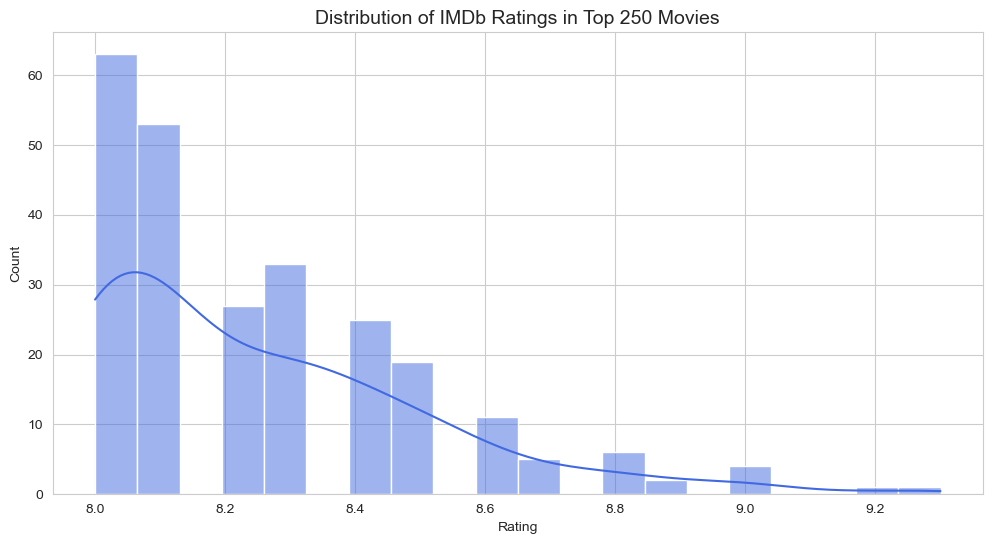

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df['Rating'], bins=20, kde=True, color='royalblue')
plt.title('Distribution of IMDb Ratings in Top 250 Movies', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [49]:
df['Rating'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ])

In [66]:
(df['Rating'][df['Rating']<=8.8].count()/df['Rating'].count())*100

96.8

In [67]:
(df['Rating'][df['Rating']>=8.8].count()/df['Rating'].count())*100

5.6000000000000005

In [71]:
df[df['Rating']>=9]

,Rank,Title,Year,Rating,Runtime,Decade,Rank_Group
0,1,The Shawshank Redemption,1994,9.3,142,1990,1-50
1,2,The Godfather,1972,9.2,175,1970,1-50
2,3,The Dark Knight,2008,9.0,152,2000,1-50
3,4,The Godfather Part II,1974,9.0,202,1970,1-50
4,5,12 Angry Men,1957,9.0,96,1950,1-50
5,6,Schindler's List,1993,9.0,195,1990,1-50


# Runtime distribution

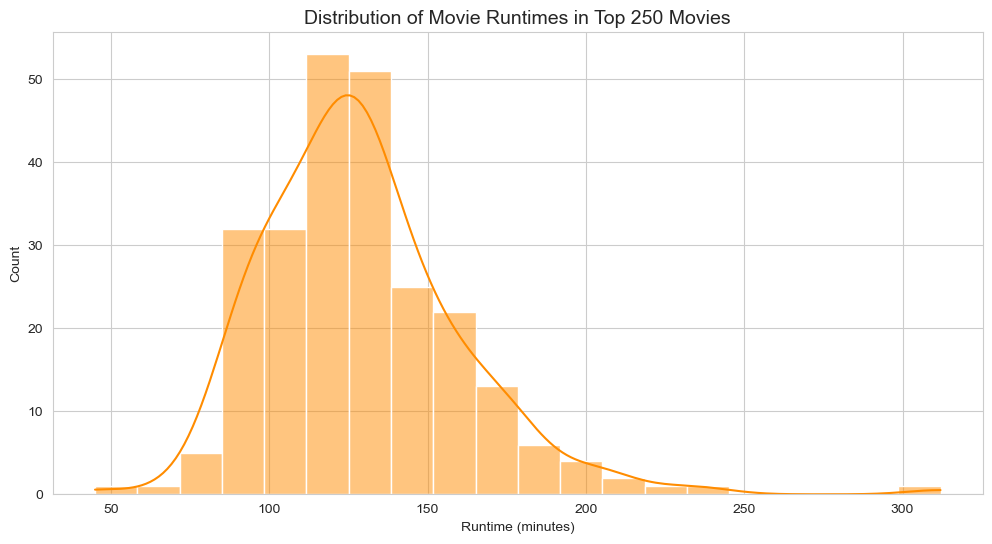

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df['Runtime'], bins=20, kde=True, color='darkorange')
plt.title('Distribution of Movie Runtimes in Top 250 Movies', fontsize=14)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

In [78]:
num=df['Runtime'][(df['Runtime'] >= 90) & (df['Runtime'] <= 150)].count()
(num/df['Runtime'].count())*100

72.39999999999999

In [86]:
df['Runtime'].value_counts().sort_values(ascending=False).head(10)

Runtime
130    7
129    7
122    7
98     6
125    5
132    5
99     5
121    5
116    5
117    5
Name: count, dtype: int64

# Year distribution

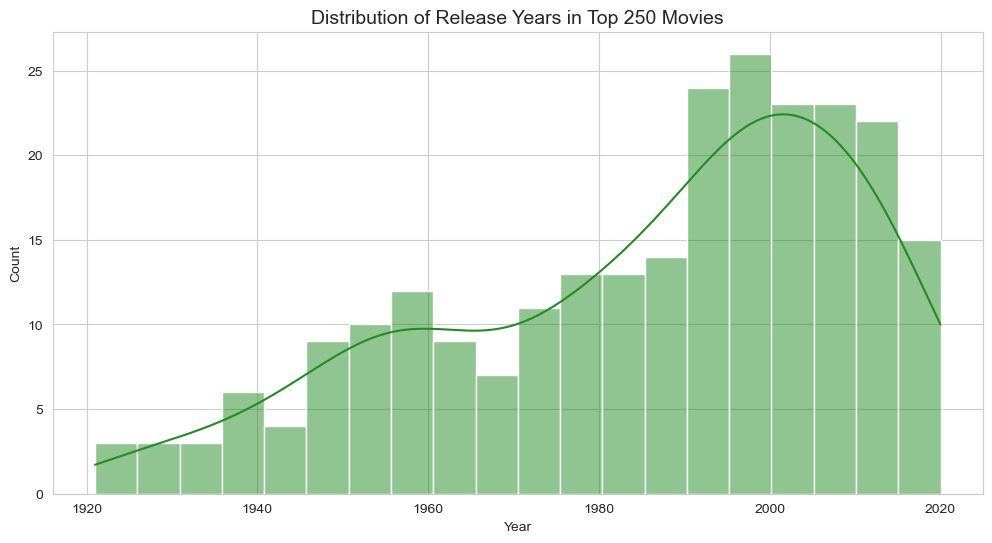

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df['Year'], bins=20, kde=True, color='forestgreen')
plt.title('Distribution of Release Years in Top 250 Movies', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Movies by decade

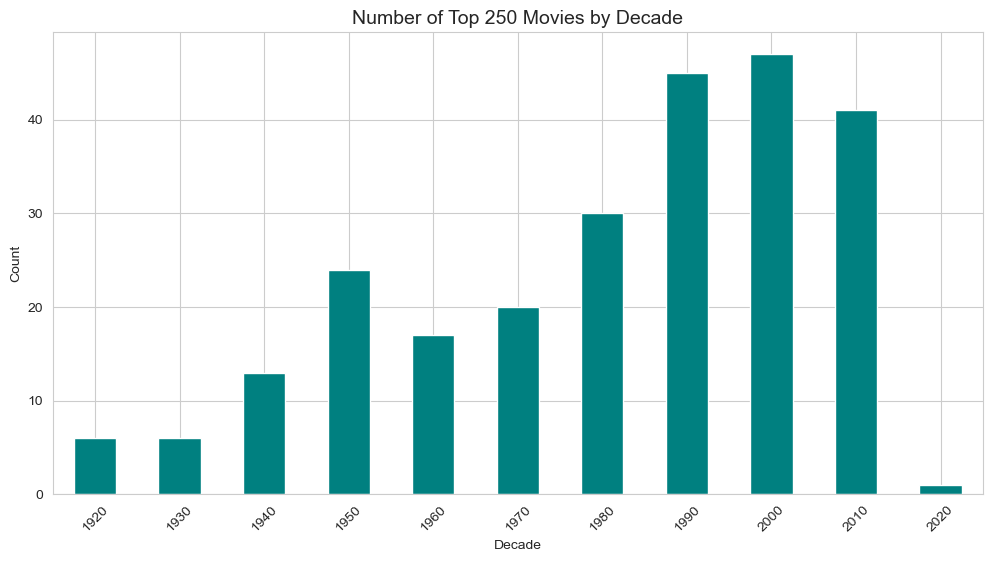

In [23]:
decade_counts = df['Decade'].value_counts().sort_index()
plt.figure(figsize=(12,6))
decade_counts.plot(kind='bar', color='teal')
plt.title('Number of Top 250 Movies by Decade', fontsize=14)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [90]:
df['Decade'].value_counts().sort_values(ascending=False).head(10)

Decade
2000    47
1990    45
2010    41
1980    30
1950    24
1970    20
1960    17
1940    13
1930     6
1920     6
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_18860\1471134381.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Rating', data=df, ci=None, color='purple', marker='o')


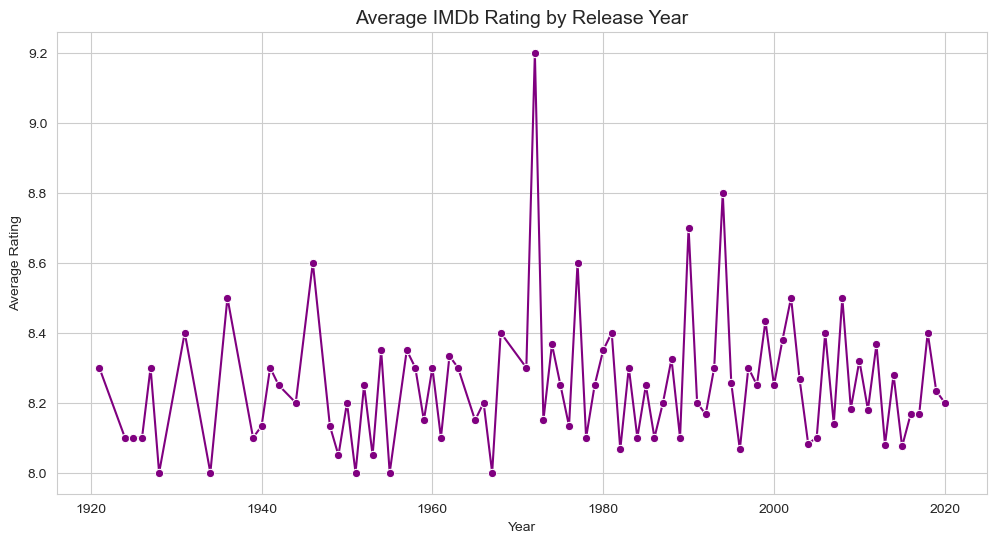

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Rating', data=df, ci=None, color='purple', marker='o')
plt.title('Average IMDb Rating by Release Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# Runtime trends over time

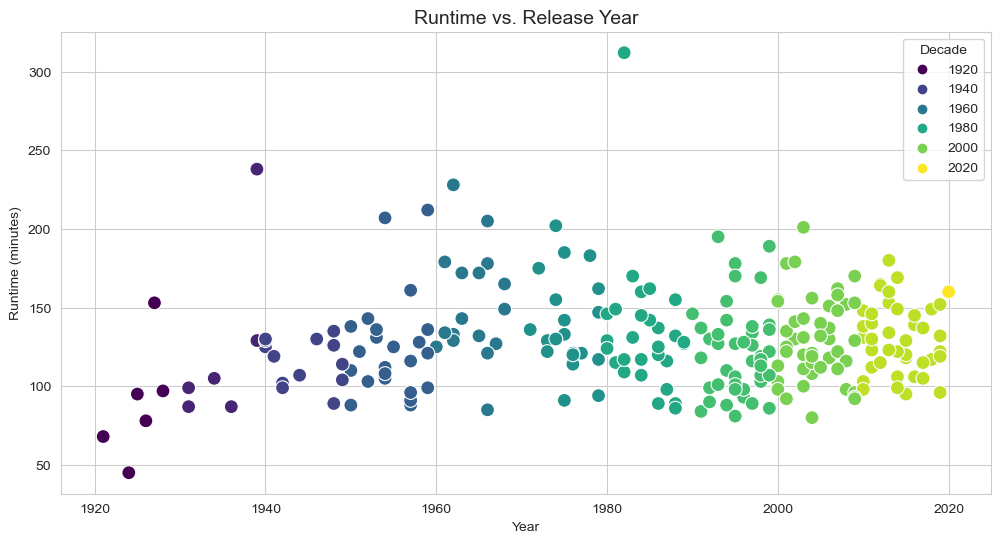

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Year', y='Runtime', data=df, hue='Decade', palette='viridis', s=100)
plt.title('Runtime vs. Release Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.legend(title='Decade')
plt.show()

# Rating vs. Rank

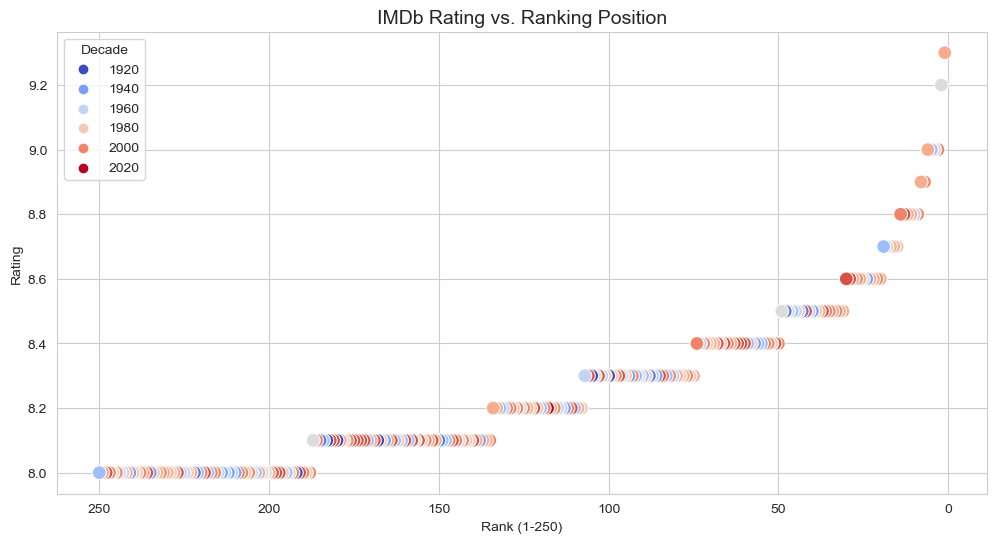

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Rank', y='Rating', data=df, hue='Decade', palette='coolwarm', s=100)
plt.title('IMDb Rating vs. Ranking Position', fontsize=14)
plt.xlabel('Rank (1-250)')
plt.ylabel('Rating')
plt.gca().invert_xaxis()  # Higher ranks first
plt.legend(title='Decade')
plt.show()

# Runtime vs. Rank

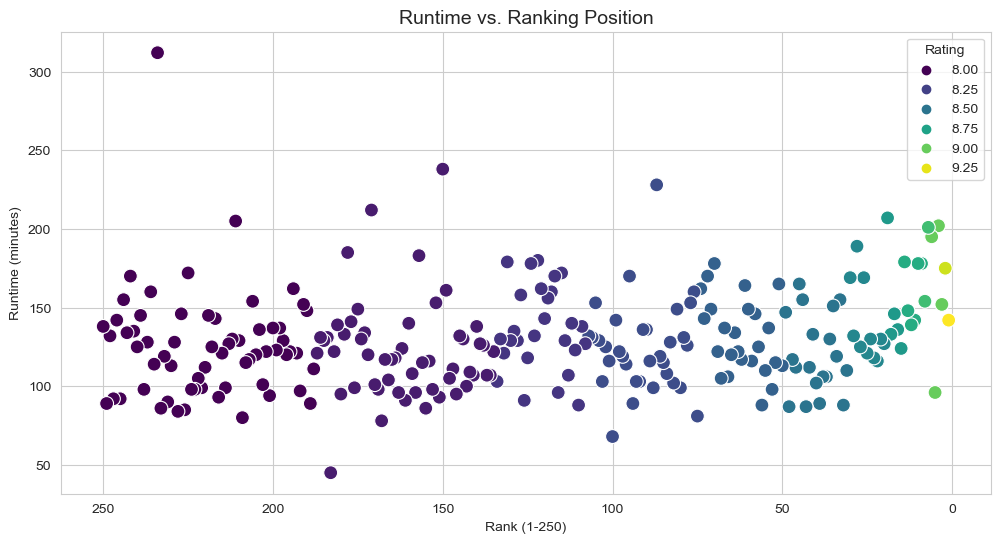

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Rank', y='Runtime', data=df, hue='Rating', palette='viridis', s=100)
plt.title('Runtime vs. Ranking Position', fontsize=14)
plt.xlabel('Rank (1-250)')
plt.ylabel('Runtime (minutes)')
plt.gca().invert_xaxis()  # Higher ranks first
plt.legend(title='Rating')
plt.show()

# Rating vs. Runtime

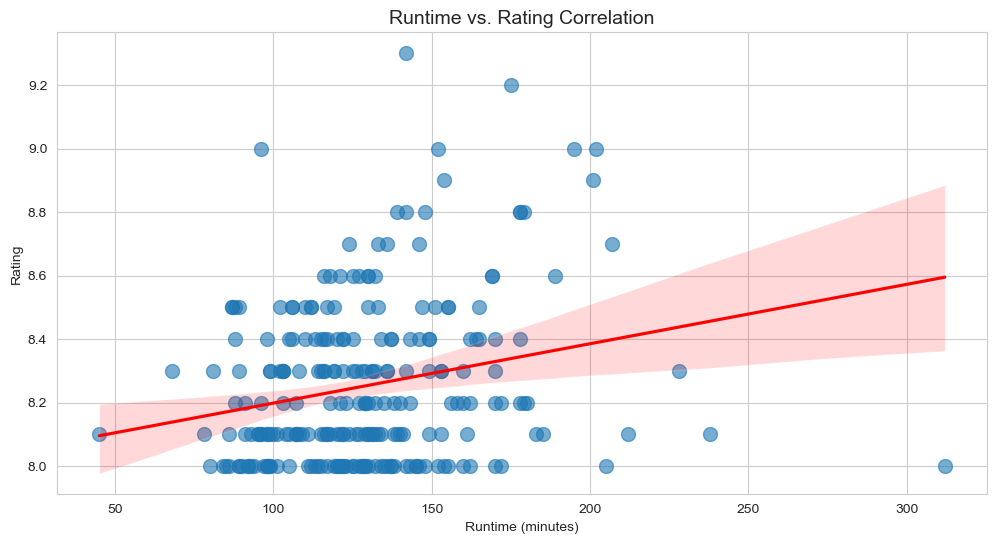

In [34]:
plt.figure(figsize=(12,6))
sns.regplot(x='Runtime', y='Rating', data=df, scatter_kws={'s':100, 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Runtime vs. Rating Correlation', fontsize=14)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.show()

# Year vs. Rating

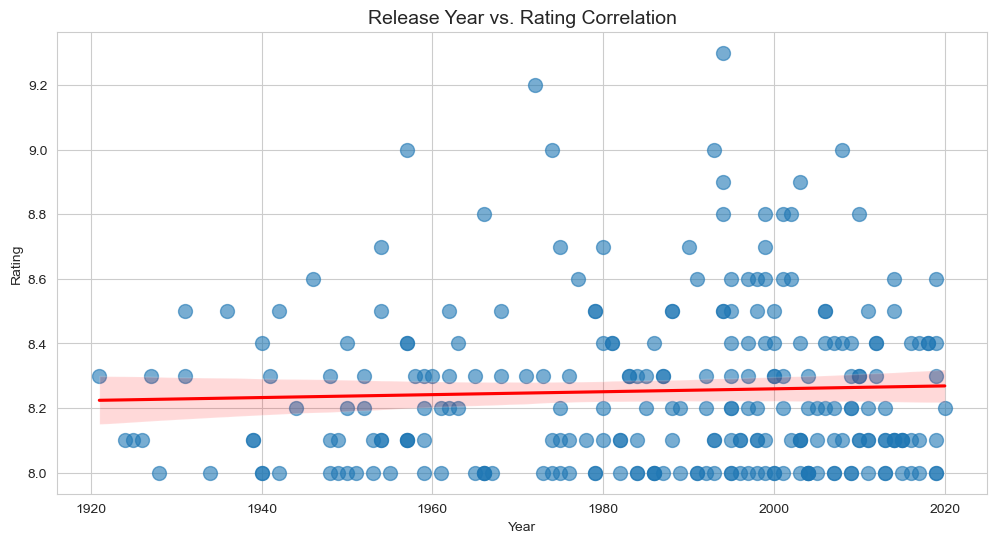

In [35]:
plt.figure(figsize=(12,6))
sns.regplot(x='Year', y='Rating', data=df, scatter_kws={'s':100, 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Release Year vs. Rating Correlation', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

# Heatmap of correlations

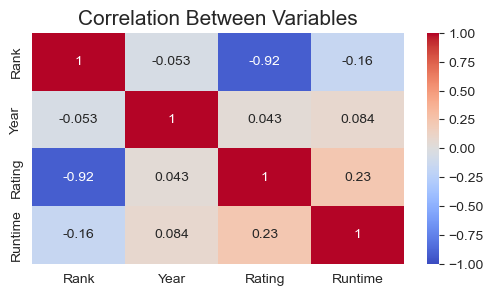

In [95]:
plt.figure(figsize=(6,3))
corr = df[['Rank', 'Year', 'Rating', 'Runtime']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Variables', fontsize=15)
plt.show()

In [39]:
total_movies = len(df)
between_8_8_8 = len(df[(df['Rating'] >= 8.0) & (df['Rating'] < 8.8)])
above_9 = len(df[df['Rating'] >= 9.0])

percent_8_to_8_8 = (between_8_8_8 / total_movies) * 100
percent_above_9 = (above_9 / total_movies) * 100
percent_8_to_8_8

94.39999999999999